In [66]:
#kullandığım kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


In [67]:
#veriyi pandas ile alıyorum.
aapl = pd.read_csv(r'C:\Users\naife\OneDrive\Masaüstü\AAPL(80-24).CSV', delimiter=',')
print(aapl.head())

#eksik veri var mı kontrol ediyorum.
eksik_degerler = aapl.isnull()
print("Eksik Değerler:\n", eksik_degerler)


         Date  Price  Open  High   Low     Vol. Change %
0  12/12/1980   0.13  0.13  0.13  0.13  469.03M  -99.88%
1  12/15/1980   0.12  0.12  0.12  0.12  175.88M   -7.69%
2  12/16/1980   0.11  0.11  0.11  0.11  105.73M   -8.33%
3  12/17/1980   0.12  0.12  0.12  0.12   86.44M    9.09%
4  12/18/1980   0.12  0.12  0.12  0.12   73.45M    0.00%
Eksik Değerler:
         Date  Price   Open   High    Low   Vol.  Change %
0      False  False  False  False  False  False     False
1      False  False  False  False  False  False     False
2      False  False  False  False  False  False     False
3      False  False  False  False  False  False     False
4      False  False  False  False  False  False     False
...      ...    ...    ...    ...    ...    ...       ...
10907  False  False  False  False  False  False     False
10908  False  False  False  False  False  False     False
10909  False  False  False  False  False  False     False
10910  False  False  False  False  False  False     False
109

In [68]:
#tekrar eden veri var mı kontrol ediyorum.
aapl.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10907    False
10908    False
10909    False
10910    False
10911    False
Length: 10912, dtype: bool

In [69]:
""" loss değerim 'nan' çıktığı için tekrar verilerimi düzeliyorum."""
eksik_degerler = aapl[aapl.isnull().any(axis=1)]
print("Eksik Değerler:\n", eksik_degerler)

Eksik Değerler:
 Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %]
Index: []


In [70]:
#ortalama almak için 2000 yılının verilerini buldum
secilen_veriler = aapl[aapl['Date'].str.contains('/2000')]

# Seçilen verileri görüntüleyin
print(secilen_veriler)

            Date  Price  Open  High   Low     Vol. Change %
4816  01/03/2000   1.00  0.94  1.00  0.91  535.82M    8.70%
4817  01/04/2000   0.92  0.97  0.99  0.90  511.73M   -8.00%
4818  01/05/2000   0.93  0.93  0.99  0.92  778.32M    1.09%
4819  01/06/2000   0.85  0.95  0.96  0.85  767.98M   -8.60%
4820  01/07/2000   0.89  0.86  0.90  0.85  460.73M    4.71%
...          ...    ...   ...   ...   ...      ...      ...
5062  12/22/2000   0.27  0.25  0.27  0.25  318.10M    8.00%
5063  12/26/2000   0.26  0.27  0.27  0.25  216.82M   -3.70%
5064  12/27/2000   0.26  0.26  0.26  0.25  325.47M    0.00%
5065  12/28/2000   0.26  0.26  0.27  0.26  305.18M    0.00%
5066  12/29/2000   0.27  0.26  0.27  0.26  631.10M    3.85%

[251 rows x 7 columns]


In [72]:
# secilen_veriler DataFrame'inizdeki 'Price' sütununun ortalamasını alın
ortalama_price = secilen_veriler['Price'].mean()
ortalama_open = secilen_veriler['Open'].mean()
ortalama_high = secilen_veriler['High'].mean()
ortalama_low = secilen_veriler['Low'].mean()
#ortalama_vol = secilen_veriler['Vol.'].mean()
#ortalama_change = secilen_veriler['Change %'].mean()

# Ortalama fiyatı yazdırın
print("Ortalama Price:", ortalama_price)
print("Ortalama open:", ortalama_open)
print("Ortalama high:", ortalama_high)
print("Ortalama low:", ortalama_low)
#print("Ortalama Price:", ortalama_vol) 
#print("Ortalama Price:", ortalama_chang)"""

Ortalama Price: 0.8156972111553785
Ortalama open: 0.8174103585657371
Ortalama high: 0.8435458167330678
Ortalama low: 0.7922709163346614


vol. ve change verilerini int olmadığı için onlarla işlem yapamadım. manuel olarak doldurcağım.

In [73]:
#ön işlemeyi bitirdim kontrol ediyorum.
eksik_degerler = aapl.isnull().sum()
print("Eksik Değerler:\n", eksik_degerler)

Eksik Değerler:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [74]:
#dizini sıfırladım yani index değerleri atadım.
aapl.reset_index(inplace=True)
print(aapl)

       index        Date   Price    Open    High     Low     Vol. Change %
0          0  12/12/1980    0.13    0.13    0.13    0.13  469.03M  -99.88%
1          1  12/15/1980    0.12    0.12    0.12    0.12  175.88M   -7.69%
2          2  12/16/1980    0.11    0.11    0.11    0.11  105.73M   -8.33%
3          3  12/17/1980    0.12    0.12    0.12    0.12   86.44M    9.09%
4          4  12/18/1980    0.12    0.12    0.12    0.12   73.45M    0.00%
...      ...         ...     ...     ...     ...     ...      ...      ...
10907  10907  03/21/2024  171.37  177.05  177.49  170.84  106.18M   -4.09%
10908  10908  03/22/2024  172.28  171.76  173.05  170.06   71.16M    0.53%
10909  10909  03/25/2024  170.85  170.37  171.94  169.46   54.21M   -0.83%
10910  10910  03/26/2024  169.71  170.01  171.41  169.65   57.22M   -0.67%
10911  10911  03/27/2024  173.31  170.30  173.58  170.14   59.11M    2.12%

[10912 rows x 8 columns]


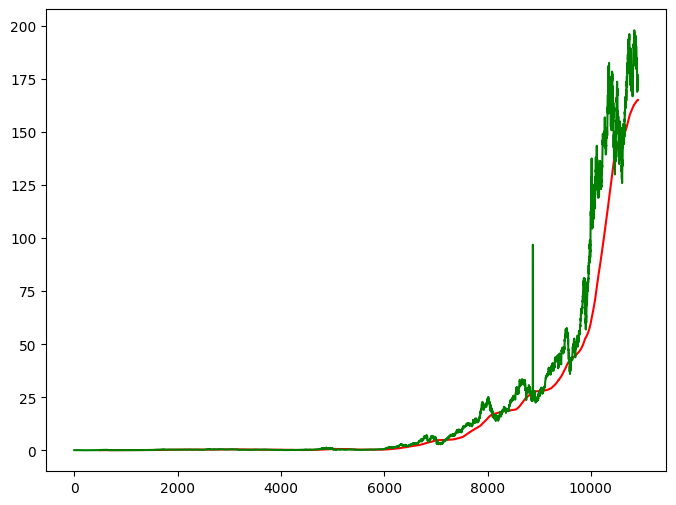

In [75]:
#100 gunluk hareketli ortalamanın grafiğini çizdirdim.
ma_500_days = aapl.Open.rolling(500).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_500_days, 'r')
plt.plot(aapl.Open, 'g')
plt.show()

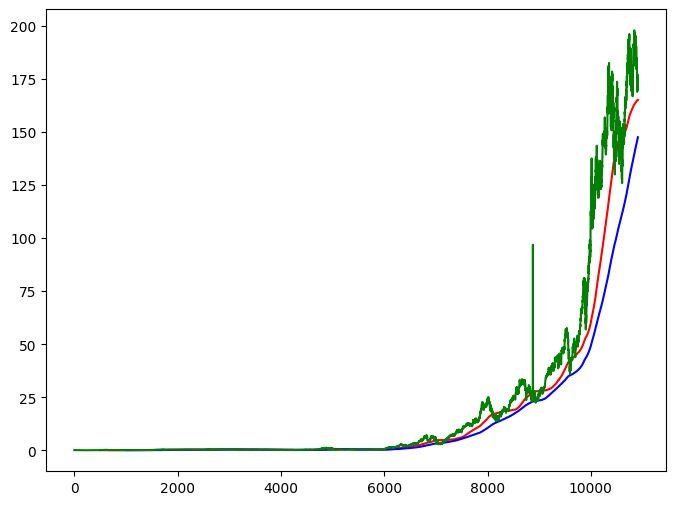

In [76]:

#son 200 günün hareketli ortalamasının grafiğini çizdiridm.
ma__1000_days =aapl.Open.rolling(1000).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_500_days, 'r')
plt.plot(ma__1000_days, 'b')
plt.plot(aapl.Open, 'g')
plt.show()

artık eksik değer yok.
modeli eğitmeye geçiyorum.

In [121]:
#verilerimi eğitim ve test verisi olarak ikiye ayırdım
aapl_train = pd.DataFrame(aapl.Open[0: int(len(aapl)*0.80)])
aapl_test = pd.DataFrame(aapl.Open[int(len(aapl)*0.80):len(aapl)])

In [122]:
#eğitim
print(aapl_train.shape[0])

#test
print(aapl_test.shape[0])

8729
2183


In [123]:
#verilerimi (0,1) aralığında ölçeklendirdim. min-max normalizasyon kullandım.
scaler = MinMaxScaler(feature_range=(0,1))
aapl_train_scale = scaler.fit_transform(aapl_train)

In [124]:
#zaman serisi verilerinin sıralı bir şekilde işlenmesinde kullanılır.
x = []
y = []
 
for i in range(100, aapl_train_scale.shape[0]):
    x.append(aapl_train_scale[i-100:i])
    y.append(aapl_train_scale[i,0])
x,y = np.array(x), np.array(y)

In [125]:
#model
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = ((x.shape[1],1)))) 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))   
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences = True))   
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))   
model.add(Dropout(0.5))

model.add(Dense(units = 1))

#modeli derliyorum.
model.compile(optimizer = 'adam', loss = 'mse')
#50 epoch 
model.fit(x,y, epochs = 30, batch_size = 35, verbose = 1)

c:\Users\naife\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 44s 153ms/step - loss: 0.0106
Epoch 2/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - loss: 0.0021
Epoch 3/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - loss: 0.0017
Epoch 4/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - loss: 0.0018
Epoch 5/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 42s 172ms/step - loss: 0.0016
Epoch 6/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 43s 173ms/step - loss: 0.0014
Epoch 7/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 54s 220ms/step - loss: 0.0014
Epoch 8/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 53s 214ms/step - loss: 0.0013
Epoch 9/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 52s 212ms/step - loss: 0.0012
Epoch 10/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 52s 212ms/step - loss: 0.0013
Epoch 11/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 54s 219ms/step - loss: 0.0013
Epoch 12/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 47s 189ms/step - loss: 0.0014
Epoch 13/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - loss: 0.0011
Epoch 14/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 42s 171ms/step - loss: 0.0013
Epoch 15/30
247

In [126]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [127]:
# son 500 günlük veriyi seçerek yeni bir data frame oluşturfum.
pas_500_days = aapl_train.tail(500)

In [128]:
# test verisi ile eğitim verisini karşılaştırıyom.
aapl_test = pd.concat([pas_500_days, aapl_test], ignore_index = True)

In [129]:

aapl_test_scale = scaler.fit_transform(aapl_test)
x = []
y = []
 
for i in range(500, aapl_test_scale.shape[0]):
    x.append(aapl_test_scale[i-500:i])
    y.append(aapl_test_scale[i,0])
x,y = np.array(x), np.array(y)  
 

In [130]:
# x giriş verisinden tahmin yaparak y_predict'e atadım.
y_predict = model.predict(x)

69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step


In [131]:
# tahminler 
print(y_predict)

[[0.13621633]
 [0.13637045]
 [0.13648696]
 ...
 [0.82832444]
 [0.8292583 ]
 [0.82952523]]


In [132]:
#dönüşüm
scale = scaler.scale_
print(scale)

[0.0054939]


In [133]:
# tahmini de dönüştürüyorum
y_predict = y_predict*scale

In [134]:
y = y*scale

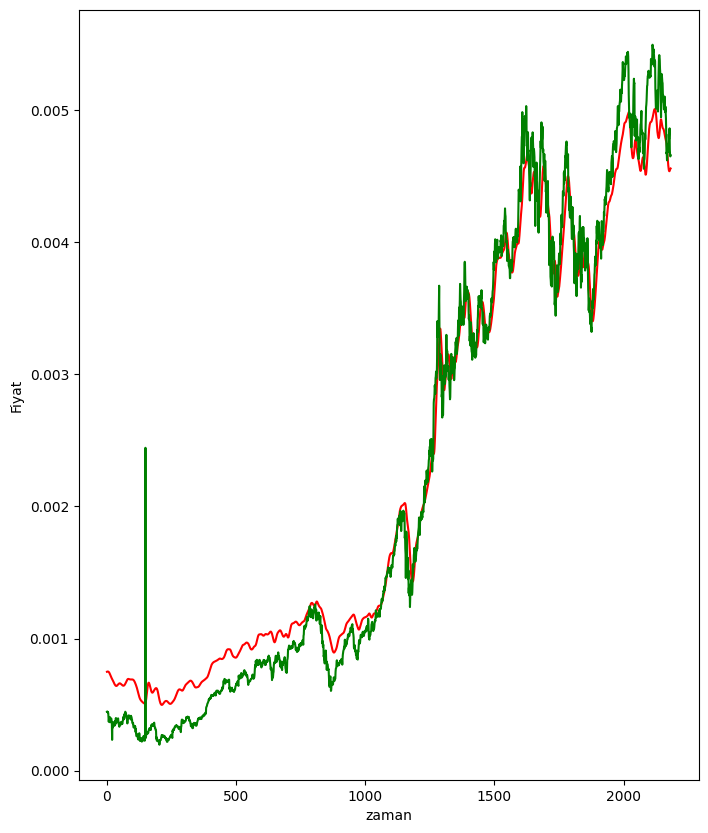

In [135]:
plt.figure(figsize=(8,10))
plt.plot(y_predict, 'r', label = 'predict Price')
plt.plot(y, 'g', label = 'original Price')
plt.xlabel('zaman')
plt.ylabel('Fiyat')
plt.legend
plt.show()

In [281]:
model.save("Stock_Predictions_Model.keras")

In [136]:
# Karelerin ortalamasını alarak MSE (Mean Squared Error) hesapla
mse = mean_squared_error(y, y_predict)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5.331697015284736e-08
